## 2.18 Homework 2: Machine Learning for Regression

In [228]:
# Import libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow plotting of all subplots in a jupyter notebook
%matplotlib inline

### Dataset

In [231]:
# Download the dataset
#data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
#response = requests.get(data)

# Save file
#with open('laptops.csv', 'wb') as file:
    #file.write(response.content)
#print("File downloaded and saved.")

# Read dataset
df_laptops = pd.read_csv('laptops.csv')

#### The goal of this homework is to create a regression model for predicting the prices (column 'Final Price')

### Preparing the dataset

In [235]:
# Normalize the names of the columns (lower letters for strings, replace blanks with _)
df_laptops.columns = df_laptops.columns.str.lower().str.replace(' ', '_')

In [237]:
# Print first five records of the dataset
print(df_laptops.head())

                                              laptop status   brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        model            cpu  ram  storage storage_type       gpu  screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  touch  final_price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.

#### Next, use only the following columns:
- 'ram',
- 'storage',
- 'screen',
- 'final_price'

In [240]:
# Filter dataframe by selected columns
df_laptops_filt = df_laptops[['ram', 'storage', 'screen', 'final_price']]
print(df_laptops_filt.head())

   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01


### EDA
- Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

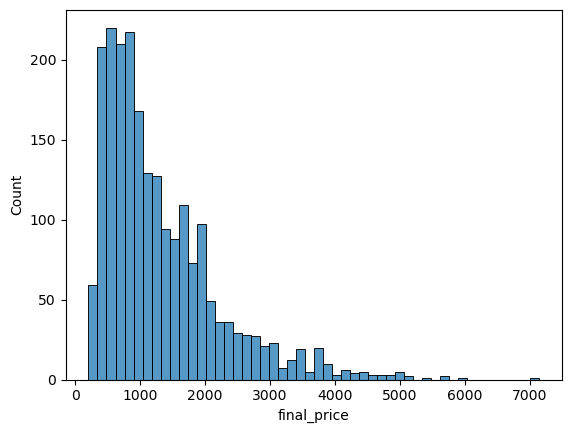

In [243]:
# Plot a histogram of final_price variable
sns.histplot(df_laptops_filt.final_price, bins=50)

#### EDA - Answer: Yes, it has a long tail to some degree. The variable 'final_price' presents a right skewed distribution.

### Question 1

There's one column with missing values. What is it?

- 'ram',
- 'storage',
- 'screen',
- 'final_price'

In [247]:
# Identify columns with missings
df_laptops_filt_col_null = df_laptops_filt.isnull().any()
df_laptops_filt_col_true_null = df_laptops_filt_col_null[df_laptops_filt_col_null == True].index[0]
print(df_laptops_filt_col_true_null)

# Alternative for doublecheck
print(df_laptops_filt.isnull().sum())

screen
ram            0
storage        0
screen         4
final_price    0
dtype: int64


#### Question 1 - Answer: 'screen'

### Question 2

What's the median (50% percentile) for variable 'ram'?

In [251]:
# Select 'ram' column in dataset and colculate the median
df_laptops_filt[['ram']].median()

ram    16.0
dtype: float64

#### Question 2 - Answer: 16

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures.

In [255]:
# Identify the number of records in the dataset
n = len(df_laptops_filt)
print(n)

# Build an artificial second index 'idx' for shuffeling the dataset
idx = np.arange(n)
print(idx)

# Shuffle the artificial index 'idx' with seed 42
np.random.seed(42)
np.random.shuffle(idx)
print(idx)

2160
[   0    1    2 ... 2157 2158 2159]
[2079  668 2073 ... 1130 1294  860]


In [257]:
# Identify the length of the dataframe and the split indices using a 60%/20%/20% distribution
n = len(df_laptops_filt)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_val + n_test + n_train)
print(n_val, n_test, n_train)

2160 2160
432 432 1296


In [259]:
# Split the dataset into training, validation and test dataset using above indices
df_laptops_filt_train = df_laptops_filt.iloc[idx[:n_train]]
df_laptops_filt_val = df_laptops_filt.iloc[idx[n_train:n_train+n_val]]
df_laptops_filt_test = df_laptops_filt.iloc[idx[n_train+n_val:]]

# Resetting the index of each dataset
df_laptops_filt_train = df_laptops_filt_train.reset_index(drop=True)
df_laptops_filt_val = df_laptops_filt_val.reset_index(drop=True)
df_laptops_filt_test = df_laptops_filt_test.reset_index(drop=True)

print(df_laptops_filt_train.head())
print(df_laptops_filt_val.head())
print(df_laptops_filt_test.head())

   ram  storage  screen  final_price
0   32     1000    15.6      1123.29
1    4       64    14.1       201.05
2   32     1000    14.0       997.74
3   16      512    13.3      1016.00
4   32     1000    16.0      2739.00
   ram  storage  screen  final_price
0   32     1000    16.0      2599.00
1   16      512    15.6       999.00
2   12      512    15.6       477.28
3    8      256    13.6      1519.00
4    8      512    15.6       402.99
   ram  storage  screen  final_price
0   32     1000    15.6      4805.65
1   16      512    13.0      2189.00
2   16      512    15.6      1349.00
3   16      512    15.0      2175.83
4   16     1000    15.6      1248.59


### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

##### Options:

- With 0
- With mean
- Both are equally good

<Axes: xlabel='final_price', ylabel='Count'>

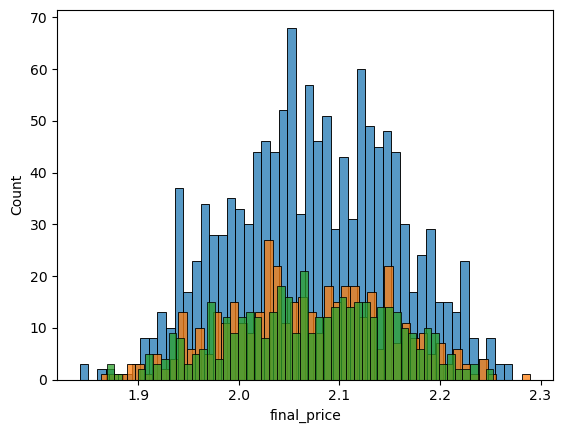

In [272]:
# Apply logarithmic function to target variable 'final_price' (because of long tailed distribution)
df_laptops_filt_train['final_price'] = np.log1p(df_laptops_filt_train.final_price.values)
df_laptops_filt_val['final_price'] = np.log1p(df_laptops_filt_val.final_price.values)
df_laptops_filt_test['final_price'] = np.log1p(df_laptops_filt_test.final_price.values)

sns.histplot(df_laptops_filt_train.final_price, bins=50)
sns.histplot(df_laptops_filt_val.final_price, bins=50)
sns.histplot(df_laptops_filt_test.final_price, bins=50)

In [282]:
# Zeros instead of missings
# Split datasets with missing values filled with zeros
df_laptops_filt_train_zero = df_laptops_filt_train.fillna(0)
df_laptops_filt_val_zero = df_laptops_filt_val.fillna(0)
df_laptops_filt_test_zero = df_laptops_filt_test.fillna(0)

In [284]:
# Mean instead of missings
# Split datasets with missings filled with column means from the training dataset only
df_laptops_filt_train_mean = df_laptops_filt_train.fillna(df_laptops_filt_train.mean())
df_laptops_filt_val_mean = df_laptops_filt_val.fillna(df_laptops_filt_train.mean())
df_laptops_filt_test_mean = df_laptops_filt_test.fillna(df_laptops_filt_train.mean())

In [290]:
# Zeros instead of missings
# Define features X und target variable y for train data
X_train_zero = df_laptops_filt_train_zero.drop('final_price', axis=1).values  # All columns except 'final_price'
y_train_zero = df_laptops_filt_train_zero['final_price'].values  # Only the target variable 'final_price'

# Define features X und target variable y for validation data
X_val_zero = df_laptops_filt_val_zero.drop('final_price', axis=1).values  # All columns except 'final_price'
y_val_zero = df_laptops_filt_val_zero['final_price'].values  # Only the target variable 'final_price'

# Define features X und target variable y for test data
X_test_zero = df_laptops_filt_test_zero.drop('final_price', axis=1).values  # All columns except 'final_price'
y_test_zero = df_laptops_filt_test_zero['final_price'].values  # Only the target variable 'final_price'

In [292]:
# Mean instead of missings
# Define features X und target variable y for train data
X_train_mean = df_laptops_filt_train_mean.drop('final_price', axis=1).values   # All columns except 'final_price'
y_train_mean = df_laptops_filt_train_mean['final_price'].values   # Only the target variable 'final_price'

# Define features X und target variable y for validation data
X_val_mean = df_laptops_filt_val_mean.drop('final_price', axis=1).values   # All columns except 'final_price'
y_val_mean = df_laptops_filt_val_mean['final_price'].values   # Only the target variable 'final_price'

# Define features X und target variable y for test data
X_test_mean = df_laptops_filt_test_mean.drop('final_price', axis=1).values   # All columns except 'final_price'
y_test_mean = df_laptops_filt_test_mean['final_price'].values   # Only the target variable 'final_price'

In [316]:
# Linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  # Add a column of ones for the bias term
    X = np.column_stack([ones, X])  # Combine ones with features
    
    XTX = X.T.dot(X)  # Compute X^T * X
    XTX_inv = np.linalg.inv(XTX)  # Invert X^T * X
    w_full = XTX_inv.dot(X.T).dot(y)  # Compute the weights
    
    # The bias term w0 ist the first element, the other elements are the weights for the features
    return w_full[0], w_full[1:]

# Zeros instead of missings
# Train the lineare regression model
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train_zero)
print(w0_zero, w_zero)

# Mean instead of missings
# Train the lineare regression model
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train_mean)
print(w0_mean, w_mean)

# Calculate the predictions for Zero-Model
y_train_pred_zero = w0_zero + X_train_zero.dot(w_zero)
y_val_pred_zero = w0_zero + X_val_zero.dot(w_zero)

# Calculate the predictions for Mean-Model
y_train_pred_mean = w0_mean + X_train_mean.dot(w_mean)
y_val_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# Show predictions
print("Predictions for training data (Zeroes):", y_train_pred_zero, "\n")
print("Predictions for validation data (Zeroes):", y_val_pred_zero, "\n")
print("Predictions for training data (Mean):", y_train_pred_mean, "\n")
print("Predictions for validation data (Mean):", y_val_pred_mean)

2.0447793894206843 [ 3.20718936e-03  8.29475488e-05 -4.68031495e-03]
2.0612234353094694 [ 3.23237390e-03  8.37182321e-05 -5.81039705e-03]
Predictions for training data (Zeroes): [2.15734408 1.99692435 2.16483259 ... 2.06555065 2.07303915 2.07303915] 

Predictions for validation data (Zeroes): [2.15547196 2.06555065 2.05272189 2.02801919 2.03989314 2.07303915
 2.09807252 2.06555065 2.01865856 2.14938755 2.05065786 2.10415693
 2.03989314 2.07631538 2.04638627 2.06555065 1.99692435 2.01865856
 2.11351756 2.01865856 2.01865856 2.10602905 2.02614707 2.01865856
 2.14938755 2.01865856 2.02614707 2.10602905 2.11351756 2.02614707
 2.14938755 2.15547196 2.02942329 2.03989314 2.06555065 2.18710448
 2.06555065 2.15734408 2.10415693 2.10602905 2.1904901  2.09807252
 2.06555065 2.01865856 2.06555065 2.0319366  2.10602905 2.15547196
 2.07303915 2.10322087 2.03989314 2.01865856 2.06555065 2.07303915
 2.03989314 2.03989314 2.06555065 2.06555065 2.11351756 2.07303915
 2.15734408 2.03989314 2.07303915 2.

In [318]:
# Define the RMSE function
def rmse(y, y_pred):
    se = (y - y_pred) ** 2  # Compute the square error
    mse = se.mean()         # Compute the mean square error
    return np.sqrt(mse)      # RMSE as square root of MSE

In [324]:
# RMSE for Zero-Model
# Calculate the RMSE for training and validation datasets
train_rmse_zero = rmse(y_train_zero, y_train_pred_zero)
val_rmse_zero = rmse(y_val_zero, y_val_pred_zero)

# Round to two decimal digits
train_rmse_zero_round = round(train_rmse_zero, 2)
val_rmse_zero_round = round(val_rmse_zero, 2)

print("RMSE (Train, Zeroes):", train_rmse_zero_round)
print("RMSE (Validation, Zeroes):", val_rmse_zero_round)

RMSE (Train, Zeroes): 0.06
RMSE (Validation, Zeroes): 0.05


In [326]:
# RMSE for Mean-Model
# Calculate the RMSE for training and validation datasets
train_rmse_mean = rmse(y_train_mean, y_train_pred_mean)
val_rmse_mean= rmse(y_val_mean, y_val_pred_mean)

# Round to two decimal digits
train_rmse_mean_round = round(train_rmse_mean, 2)
val_rmse_mean_round = round(val_rmse_mean, 2)

print("RMSE (Train, Means):", train_rmse_mean_round)
print("RMSE (Validation, Means):", val_rmse_mean_round)

RMSE (Train, Means): 0.06
RMSE (Validation, Means): 0.06


#### Question 3 - Answer: With 0

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

##### Options:
- 0
- 0.01
- 1
- 10
- 100

In [343]:
# Define the function for regularized linear regression (Ridge Regression)
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])  # Add a column of ones for the bias term
    X = np.column_stack([ones, X])  # Combine ones with features

    XTX = X.T.dot(X)  # Compute X^T * X
    reg_matrix = r * np.eye(XTX.shape[0])  # Create the regularization matrix (L2 regularization)
    reg_matrix[0, 0] = 0  # The bias term (w0) is not regularized

    XTX_inv = np.linalg.inv(XTX + reg_matrix)  # Invert (X^T * X + regularization matrix)
    w_full = XTX_inv.dot(X.T).dot(y)  # Compute the weights

    return w_full[0], w_full[1:]

# Test regularization with different values of r
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # Use already prepared datasets with zero-filled missing values
    X_train_zero = df_laptops_filt_train_zero
    y_train_zero = df_laptops_filt_train['final_price'].values
    
    w0, w = train_linear_regression_reg(X_train_zero, y_train_zero, r=r)

    # Evaluate the model on the validation dataset
    X_val_zero = df_laptops_filt_val_zero
    y_val_zero = df_laptops_filt_val['final_price'].values
    y_pred = w0 + X_val_zero.dot(w)
    score = rmse(y_val_zero, y_pred)
    
    score_round = round(score, 2) # Round score to two decimal digits
    
    print(f"Regularization (r={r}): w0={w0}, RMSE={score_round}") 

Regularization (r=0): w0=-8.761880110341735e-13, RMSE=0.0
Regularization (r=0.01): w0=0.00486199839260637, RMSE=0.0
Regularization (r=0.1): w0=0.047601228779681204, RMSE=0.0
Regularization (r=1): w0=0.393549107736618, RMSE=0.01
Regularization (r=5): w0=1.1117217327569415, RMSE=0.03
Regularization (r=10): w0=1.4401901272277287, RMSE=0.04
Regularization (r=100): w0=1.959688758942845, RMSE=0.05


#### Question 4 - Answer: 0

### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

##### What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [362]:
# Define the base features
base = ['ram', 'storage', 'screen']  # Exclude 'final_price' as it's the target variable

# Define your features (X) and target variable (y)
X = df_laptops_filt[base].fillna(0).values  # Features
y = df_laptops_filt['final_price'].values   # Target variable

# Get the total length of the dataset
n = len(df_laptops_filt)

# Define the number of rows for validation and test sets (each 20%)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test  # The remaining rows are for training

# List to store the RMSE for each seed
rmse_scores = []

# Function for RMSE calculation
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred) ** 2))

# Loop over each seed value to test the impact on the RMSE
for seed in range(10):
    # Shuffle the dataset with the given seed for consistency
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Shuffle the data based on the randomized indices
    X_shuffled = X[idx]
    y_shuffled = y[idx]

    # Split the data into train, validation, and test sets
    X_train = X_shuffled[:n_train]
    y_train = y_shuffled[:n_train]
    
    X_val = X_shuffled[n_train:n_train + n_val]
    y_val = y_shuffled[n_train:n_train + n_val]
    
    X_test = X_shuffled[n_train + n_val:]
    y_test = y_shuffled[n_train + n_val:]

    # Train the linear regression model without regularization (r=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)

    # Make predictions on the validation set
    y_pred = w0 + X_val.dot(w)

    # Calculate RMSE and store the score
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# Calculate the standard deviation of the RMSE scores
std = np.std(rmse_scores)

# Print the result rounded to 3 decimal places
print("Standard deviation of RMSE scores:", round(std, 3))

Standard deviation of RMSE scores: 29.176


#### Q5 - Answer: 29.176

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

##### Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [368]:
# Define the base features
base = ['ram', 'storage', 'screen']  # Exclude 'final_price' as it's the target variable

# Define your features (X) and target variable (y)
X = df_laptops_filt[base].fillna(0).values  # Features
y = df_laptops_filt['final_price'].values   # Target variable

# Get the total length of the dataset
n = len(df_laptops_filt)

# Define the number of rows for validation and test sets (each 20%)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test  # The remaining rows are for training

# Use seed 9 for the split
seed = 9

# Shuffle the dataset with seed 9
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

# Shuffle the data based on the randomized indices
X_shuffled = X[idx]
y_shuffled = y[idx]

# Split the data into train+validation and test sets
X_train_val = X_shuffled[:n_train + n_val]
y_train_val = y_shuffled[:n_train + n_val]

X_test = X_shuffled[n_train + n_val:]
y_test = y_shuffled[n_train + n_val:]

# Train the linear regression model with regularization r=0.001
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

# Make predictions on the test set
y_pred_test = w0 + X_test.dot(w)

# Calculate RMSE for the test set
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred) ** 2))

test_rmse = rmse(y_test, y_pred_test)

# Print the RMSE for the test dataset
print("RMSE on the test dataset:", test_rmse)

RMSE on the test dataset: 608.6102784353469


#### Q5 - Answer: 608.61